### Visualizing the regression manifold of NONA VS LR VS KNN on differently arranged synthetic data

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
import models
import similarity as s
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from mpl_toolkits import mplot3d
from sklearn.neighbors import KNeighborsRegressor
from tqdm import tqdm
from importlib import reload

In [26]:
grid_size = 100
axes = 1
g1, g2 = np.meshgrid(np.linspace(-axes, axes, grid_size), np.linspace(-axes, axes, grid_size))
grid_points = torch.tensor(np.c_[g1.ravel(), g2.ravel()], dtype=torch.float64)

In [27]:
np.random.seed(42)

num_samples = 1000
X = np.random.uniform(-1,1, (num_samples,2))
X = torch.tensor(X, dtype=torch.float64)
x1, x2 = X[:,0], X[:,1]

noise = np.random.normal(0, 0.1, num_samples)

Linearly separable data

/tmp/ipykernel_3888230/693376363.py:1: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  y = (X[:, 1] / 2 + 1/2  + noise)
/tmp/ipykernel_3888230/693376363.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.float64)


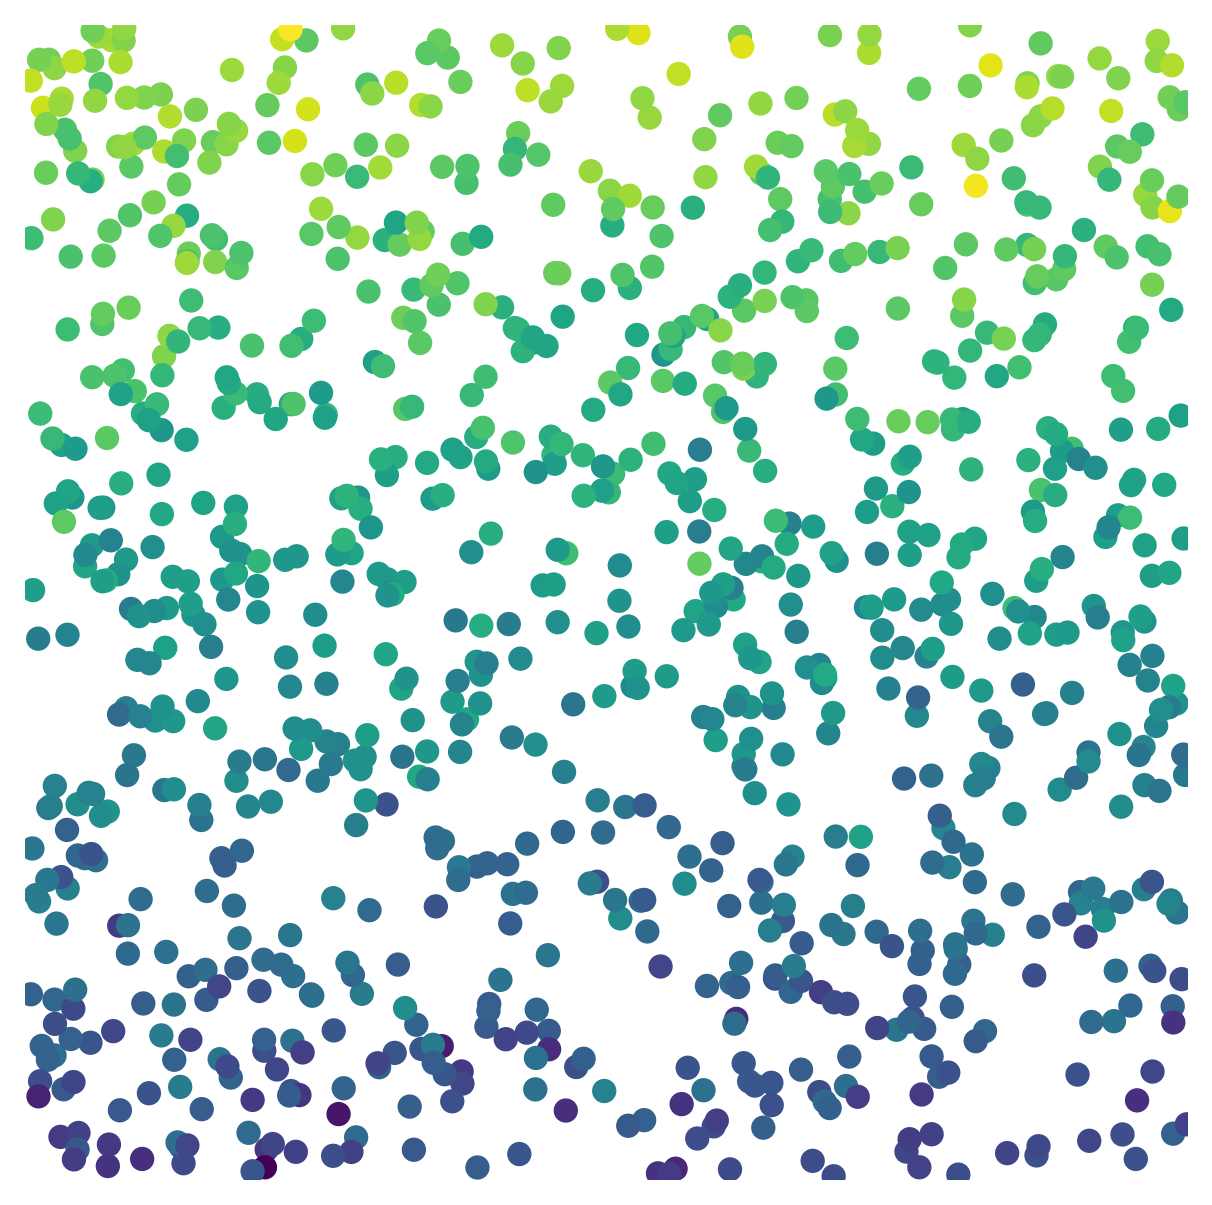

In [28]:
y = (X[:, 1] / 2 + 1/2  + noise)
y = torch.tensor(y, dtype=torch.float64)

plt.figure(figsize=(6, 6), dpi=250)
plt.scatter(X[:, 0], X[:, 1], c=y)

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axis(False)
plt.show()

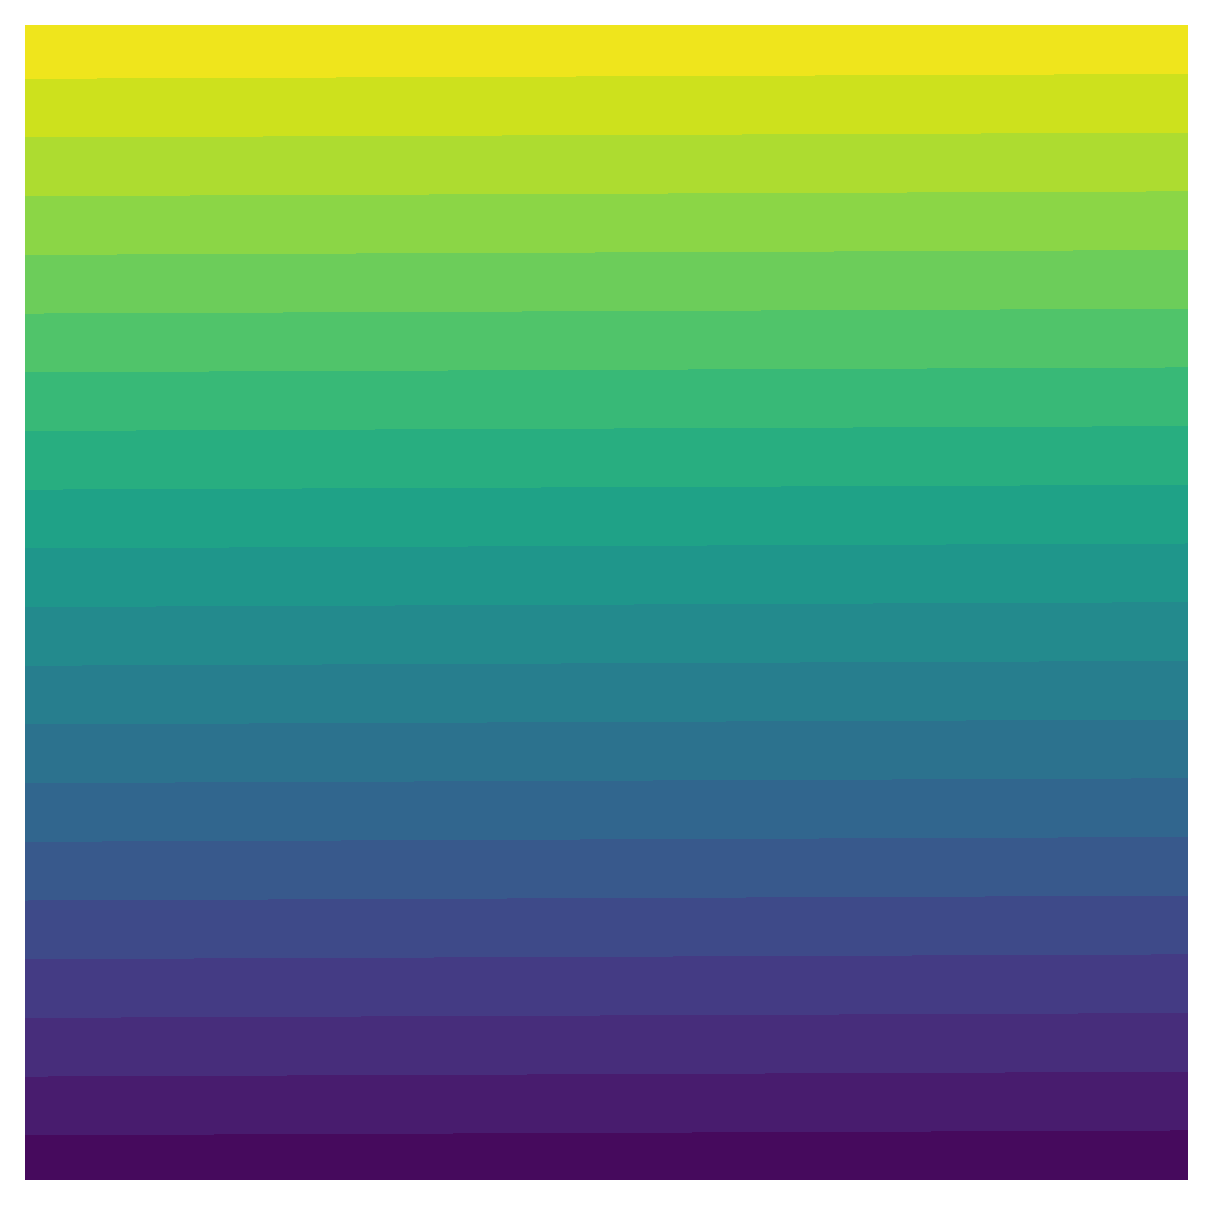

In [29]:
model = LinearRegression()
model.fit(X, y)

preds = model.predict(grid_points).reshape(grid_size, grid_size)

plt.figure(figsize=(6, 6), dpi=250)
plt.contourf(g1, g2, preds, levels=20)

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axis(False)
plt.show()


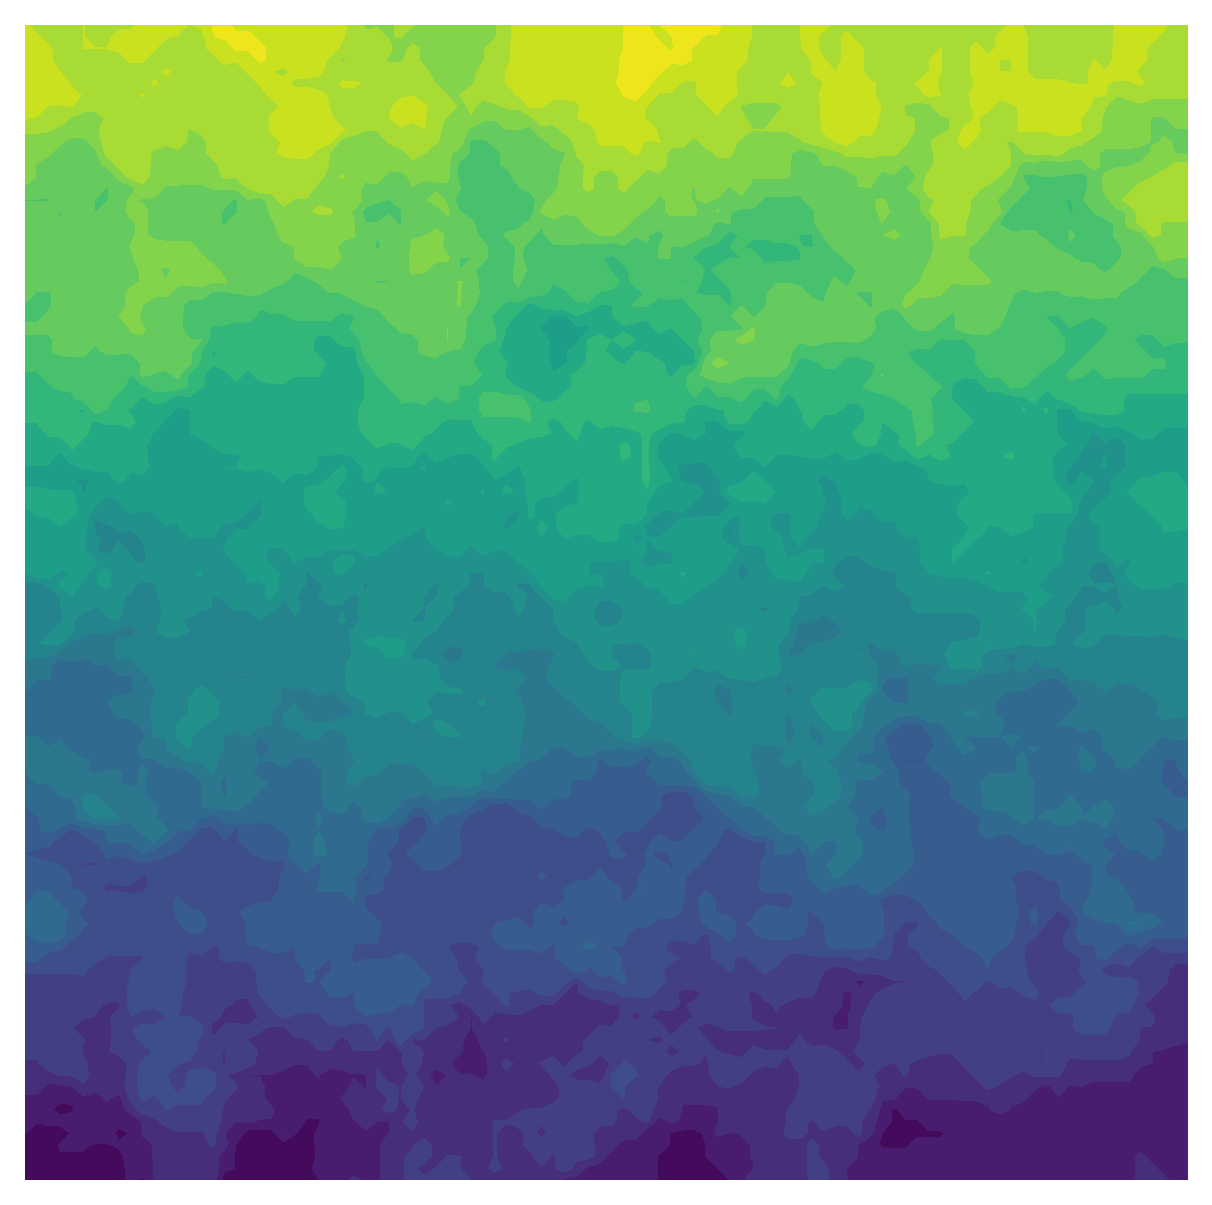

In [30]:
model = KNeighborsRegressor()
model.fit(X, y)

preds = model.predict(grid_points).reshape(grid_size, grid_size)

plt.figure(figsize=(6, 6), dpi=250)
plt.contourf(g1, g2, preds, levels=20)

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axis(False)
plt.show()

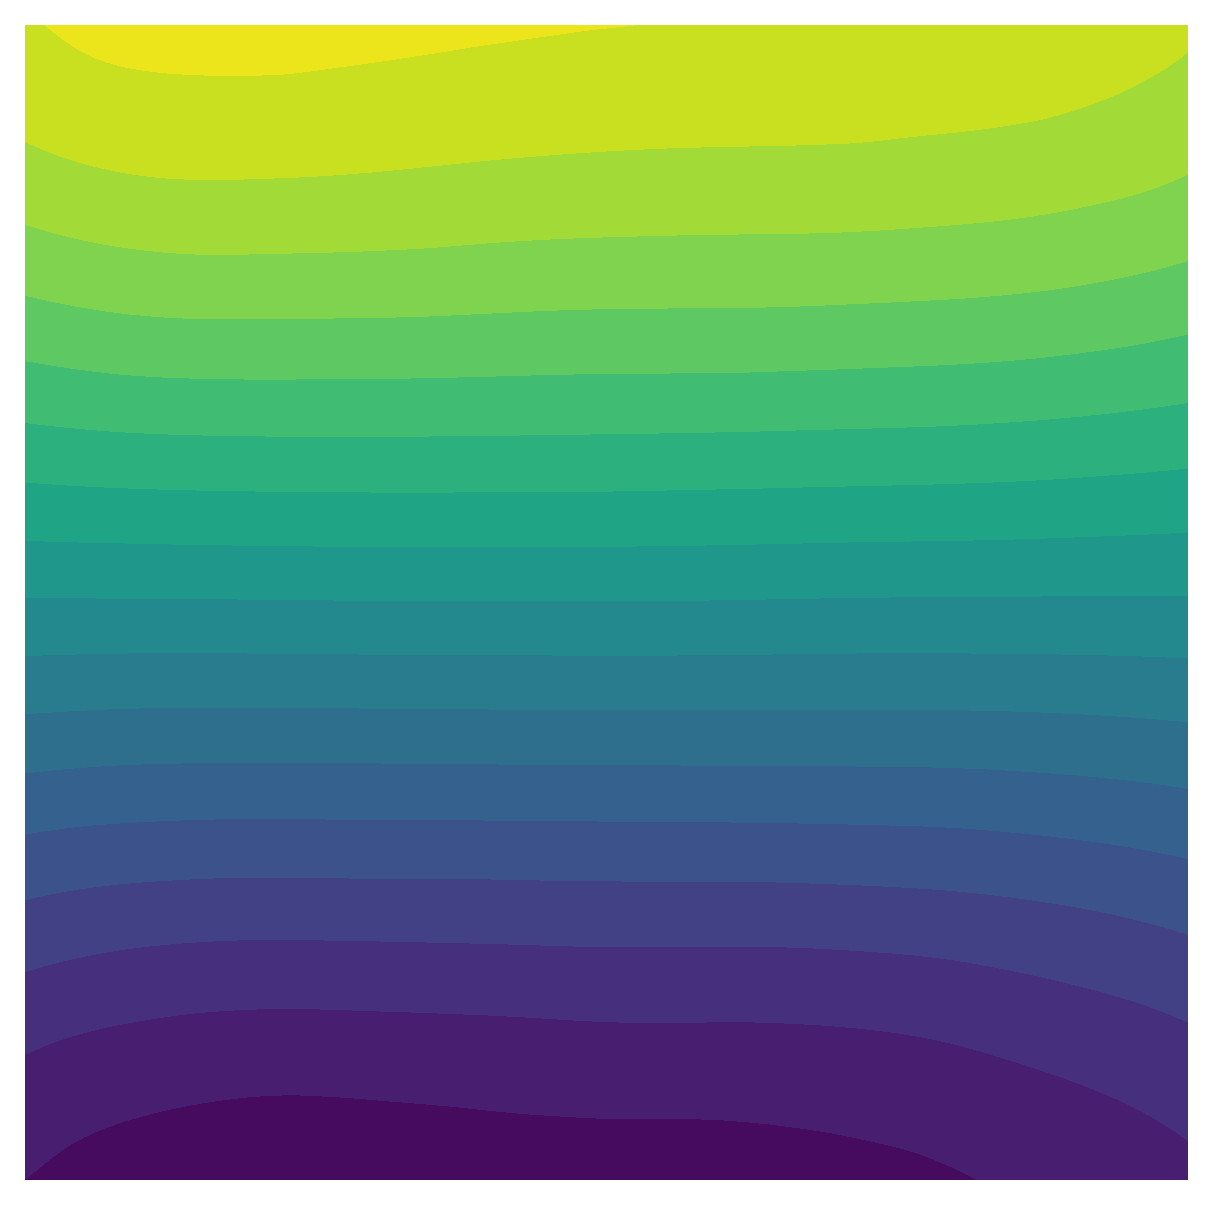

In [31]:
model = models.NONA()
preds = model(grid_points, X, y).reshape(grid_size, grid_size)

# Plot the heatmap using contourf
plt.figure(figsize=(6, 6), dpi=250)
plt.contourf(g1, g2, preds, levels=20)

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axis(False)
plt.show()

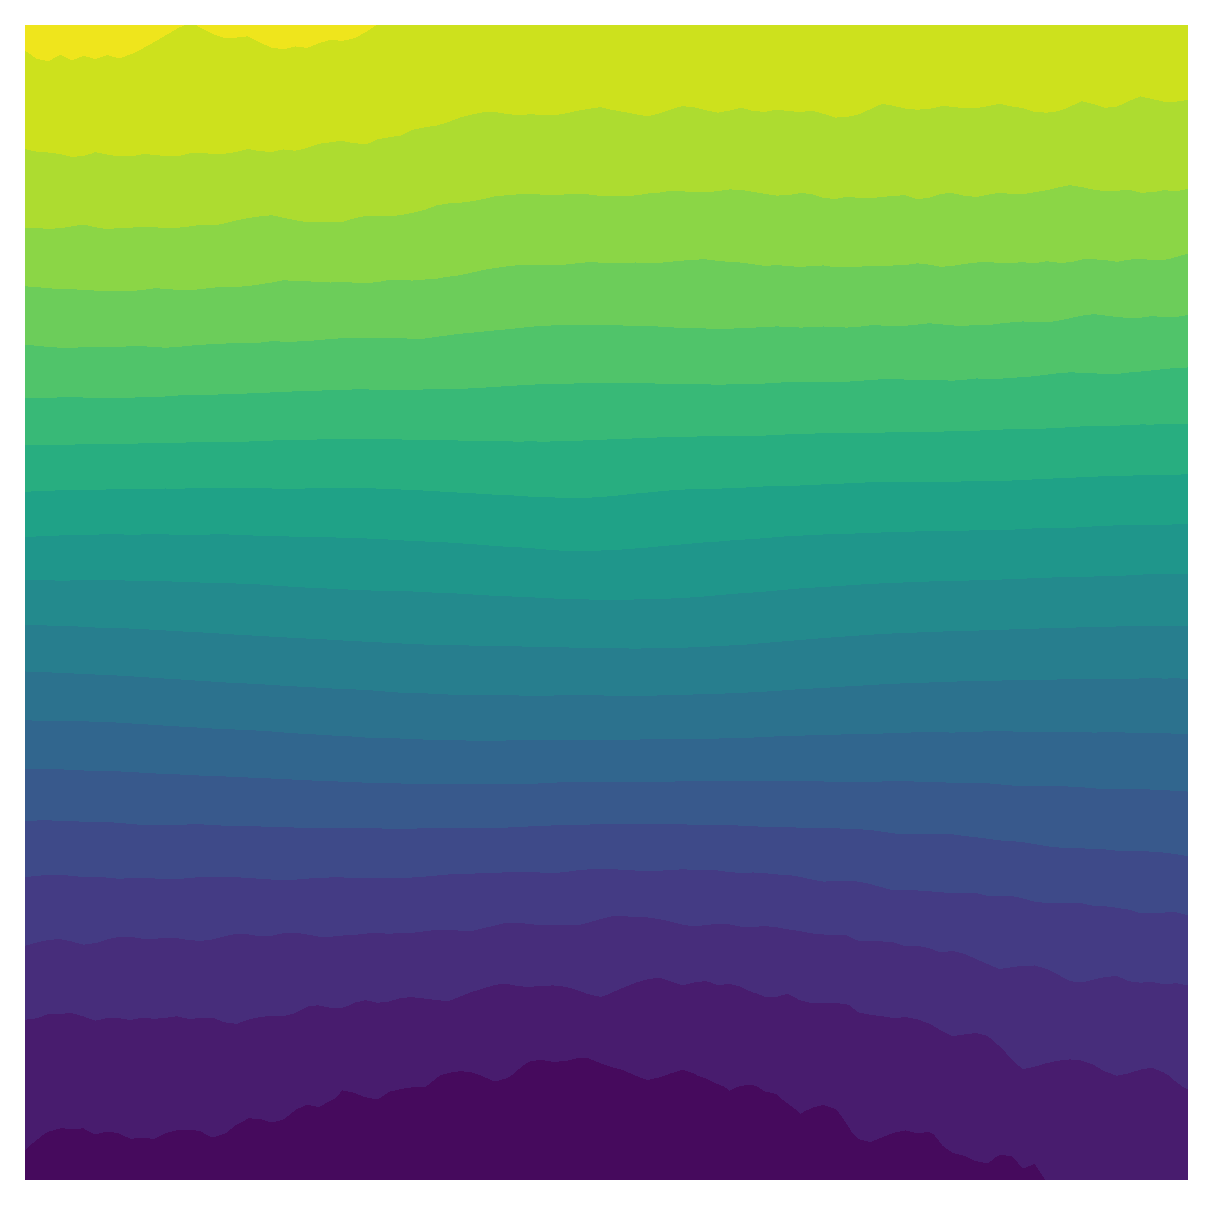

In [32]:
data = TensorDataset(X,y)
loader = DataLoader(data, shuffle=True, batch_size=32)
softstep = s.SoftStep(dims=2, step_fn=2)
model = models.NONA(softstep=softstep)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

for epoch in range(800):
    loss = 0.0
    for x_b,y_b in loader:
        outputs = model(x_b,x_b,y_b)
        l = criterion(outputs, y_b)
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
        loss += l.item()
    loss /= len(loader)

preds = model(grid_points, X, y).reshape(grid_size, grid_size).detach().numpy()

# Plot the heatmap using contourf
plt.figure(figsize=(6, 6), dpi=250)
plt.contourf(g1, g2, preds, levels=20)

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axis(False)
plt.show()

Radially separable data

/tmp/ipykernel_3888230/3043369637.py:2: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  y = torch.min(1-torch.abs(X[:,0]), 1-torch.abs(X[:,1])) + noise
/tmp/ipykernel_3888230/3043369637.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.float64)


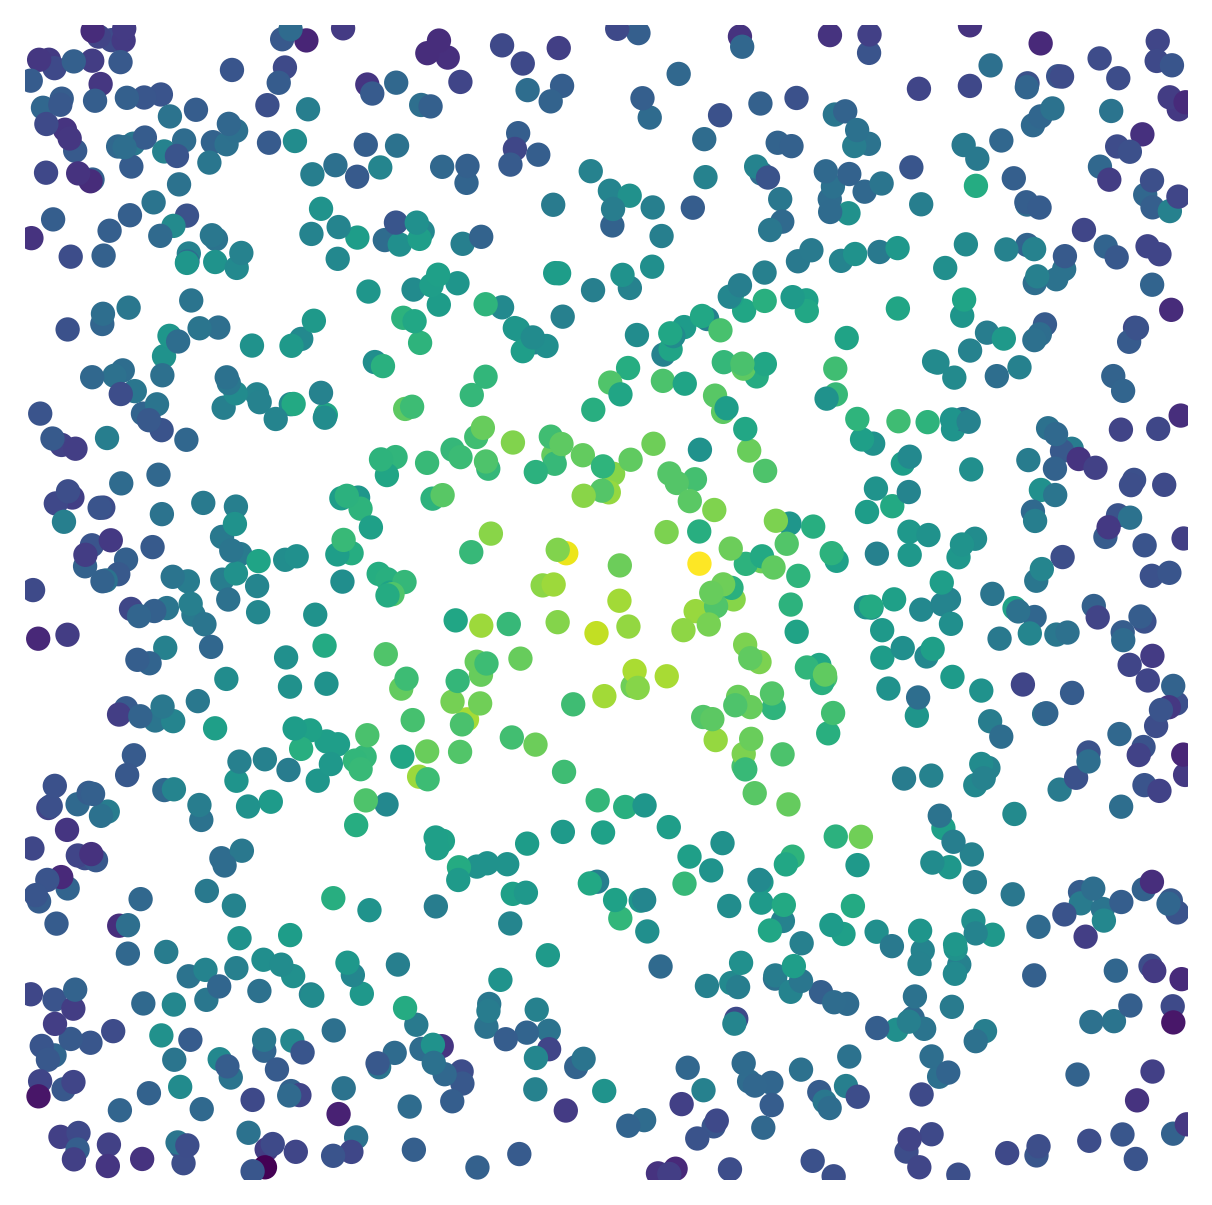

In [33]:
# y = np.sqrt(X[:,0]**2 + X[:,1]**2) + noise
y = torch.min(1-torch.abs(X[:,0]), 1-torch.abs(X[:,1])) + noise
y = torch.tensor(y, dtype=torch.float64)


# Plot the data
plt.figure(figsize=(6, 6), dpi=250)
plt.scatter(X[:, 0], X[:, 1], c=y)

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axis(False)
plt.show()

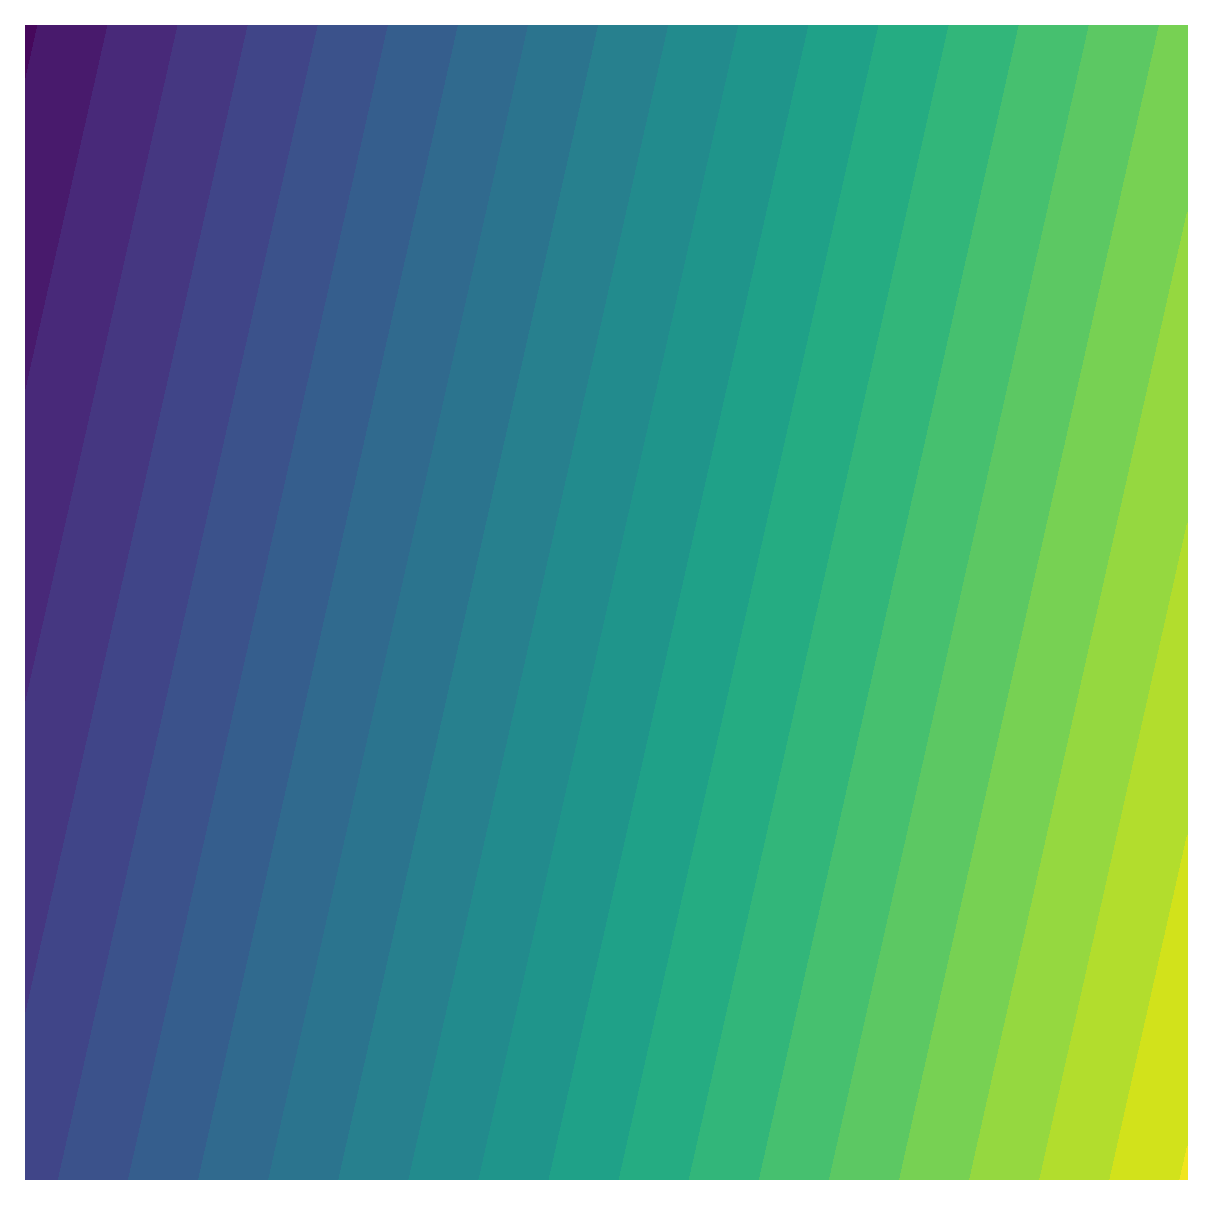

In [34]:
model = LinearRegression()
model.fit(X, y)

preds = model.predict(grid_points).reshape(grid_size, grid_size)

plt.figure(figsize=(6, 6), dpi=250)
plt.contourf(g1, g2, preds, levels=20)

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axis(False)
plt.show()

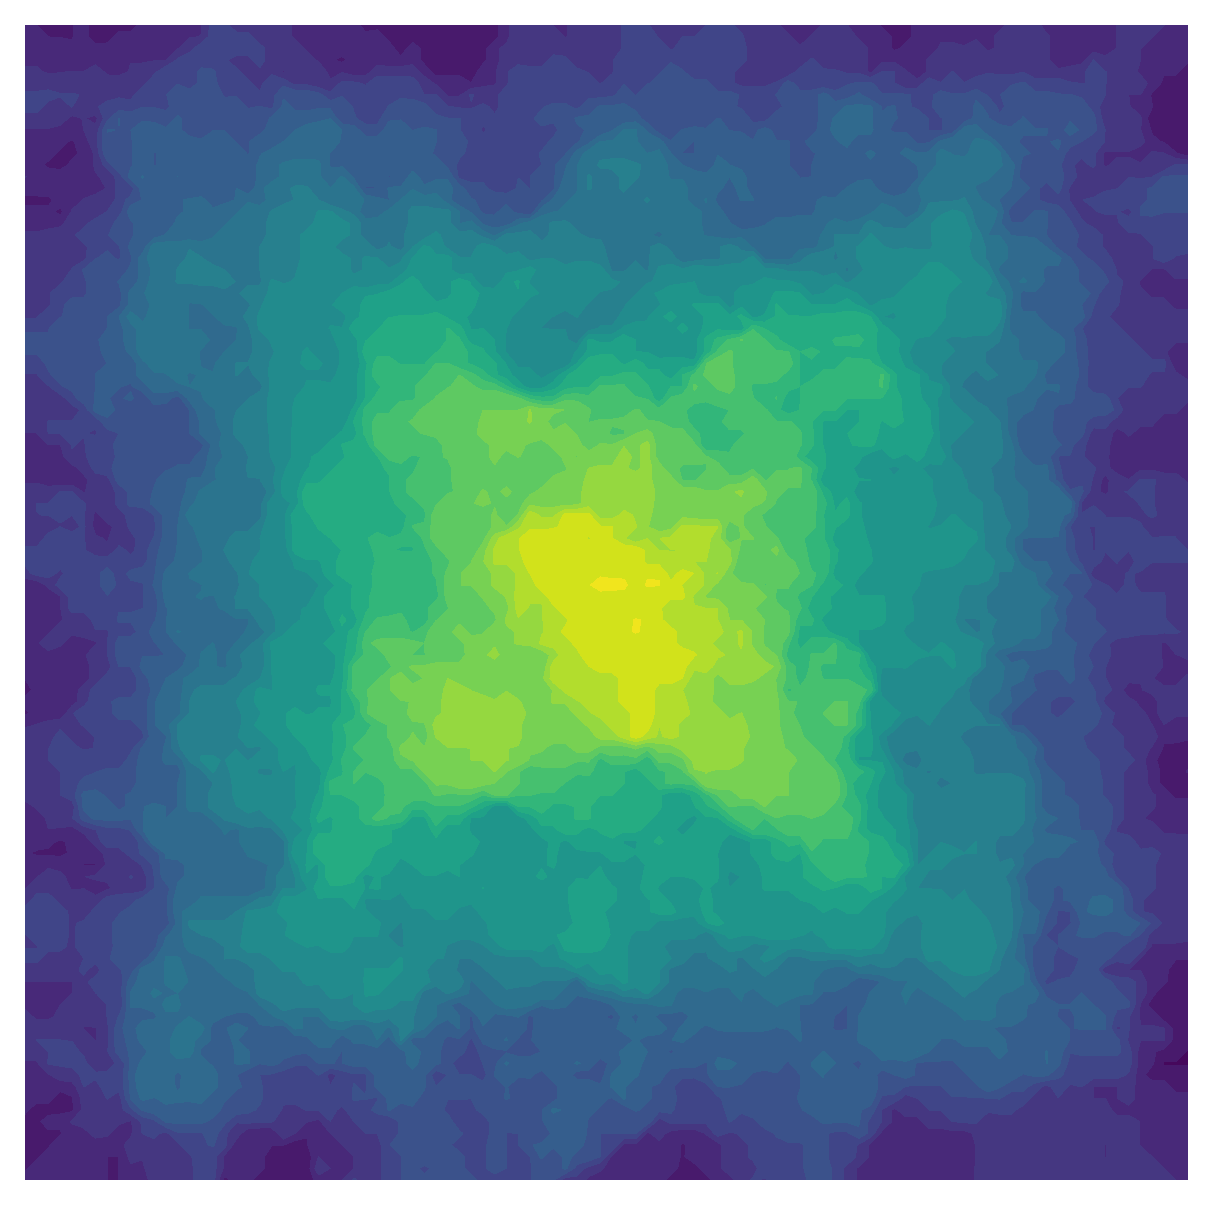

In [35]:
model = KNeighborsRegressor()
model.fit(X, y)

preds = model.predict(grid_points).reshape(grid_size, grid_size)

plt.figure(figsize=(6, 6), dpi=250)
plt.contourf(g1, g2, preds, levels=20)

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axis(False)
plt.show()

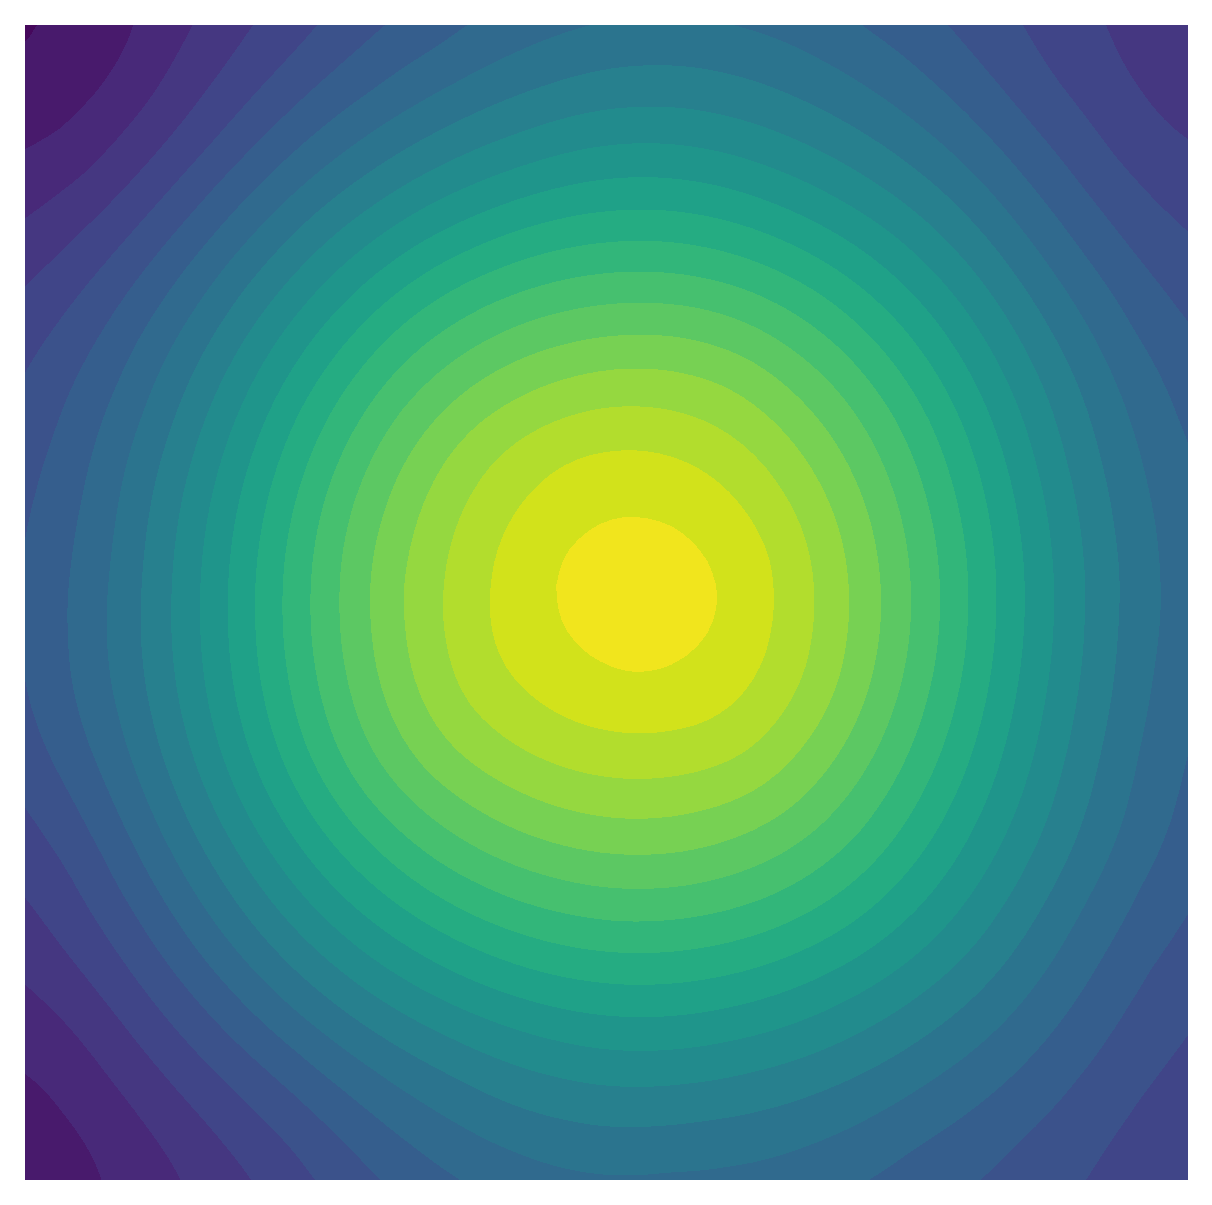

In [36]:
model = models.NONA()
preds = model(grid_points, X, y).reshape(grid_size, grid_size)

# Plot the heatmap using contourf
plt.figure(figsize=(6, 6), dpi=250)
plt.contourf(g1, g2, preds, levels=20)

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axis(False)
plt.show()

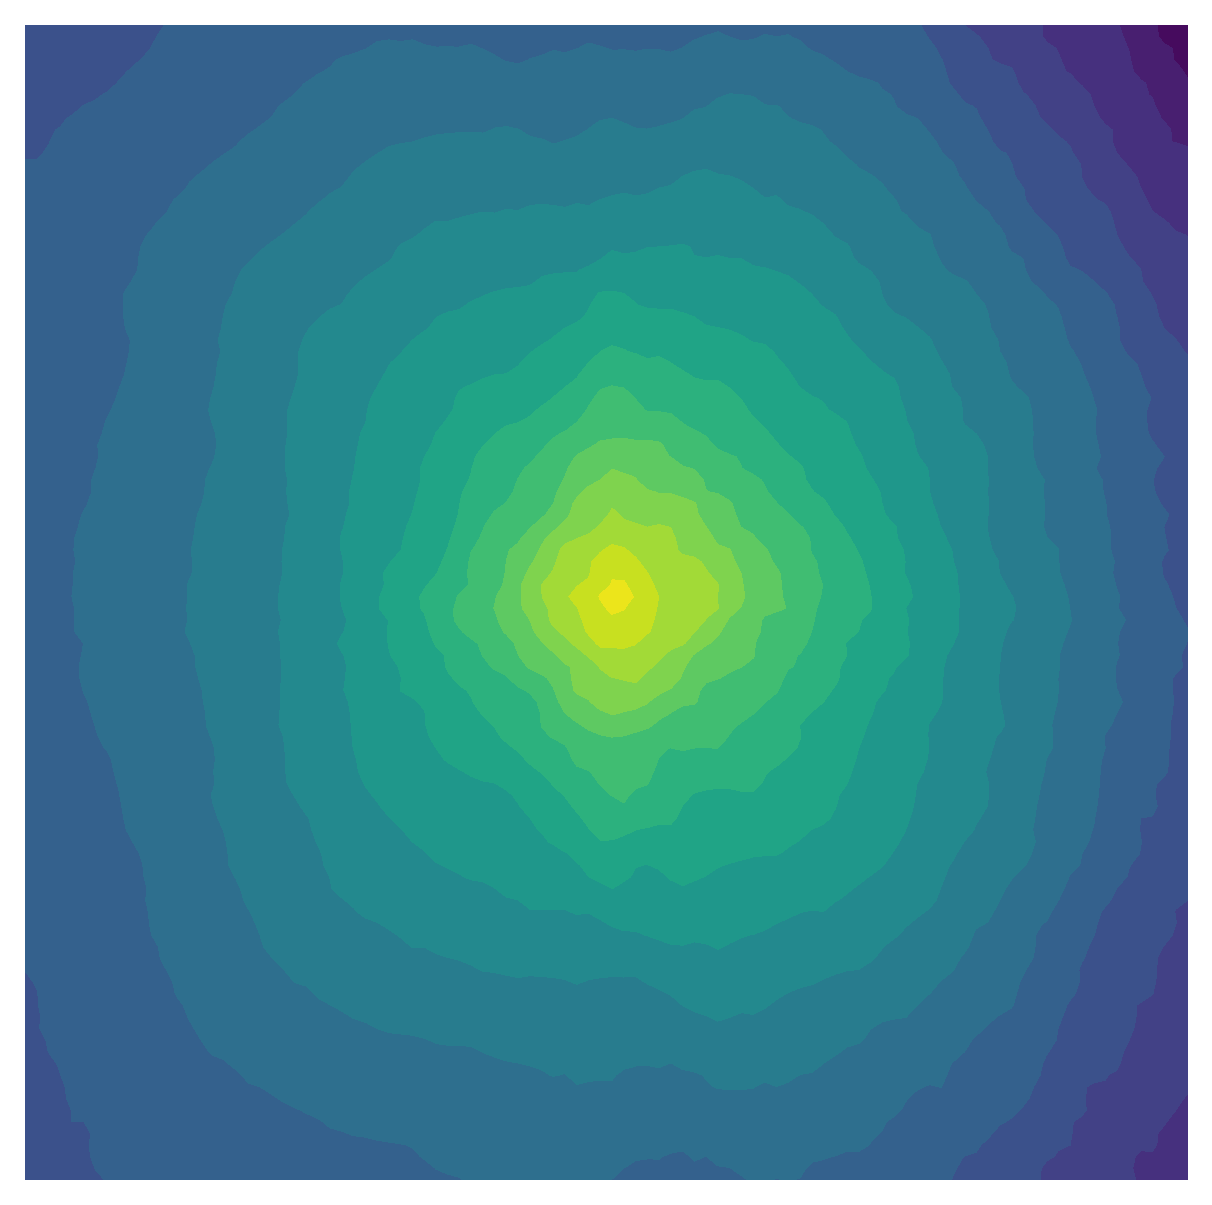

In [37]:
data = TensorDataset(X,y)
loader = DataLoader(data, shuffle=True, batch_size=32)
softstep = s.SoftStep(dims=2, step_fn=2)
model = models.NONA(softstep=softstep)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

for epoch in range(800):
    loss = 0.0
    for x_b,y_b in loader:
        outputs = model(x_b,x_b,y_b)
        l = criterion(outputs, y_b)
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
        loss += l.item()
    loss /= len(loader)

preds = model(grid_points, X, y).reshape(grid_size, grid_size).detach().numpy()

# Plot the heatmap using contourf
plt.figure(figsize=(6, 6), dpi=250)
plt.contourf(g1, g2, preds, levels=20)

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axis(False)
plt.show()

Spiral data

/tmp/ipykernel_3888230/516189083.py:2: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  r = np.sqrt(x1**2 + x2**2)
/tmp/ipykernel_3888230/516189083.py:3: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  theta = np.arctan2(x2, x1)
/tmp/ipykernel_3888230/516189083.py:5: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  y = (theta + 5 * r) % (2 * np.pi) + noise
/tmp/ipykernel_3888230/516189083.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.float64)


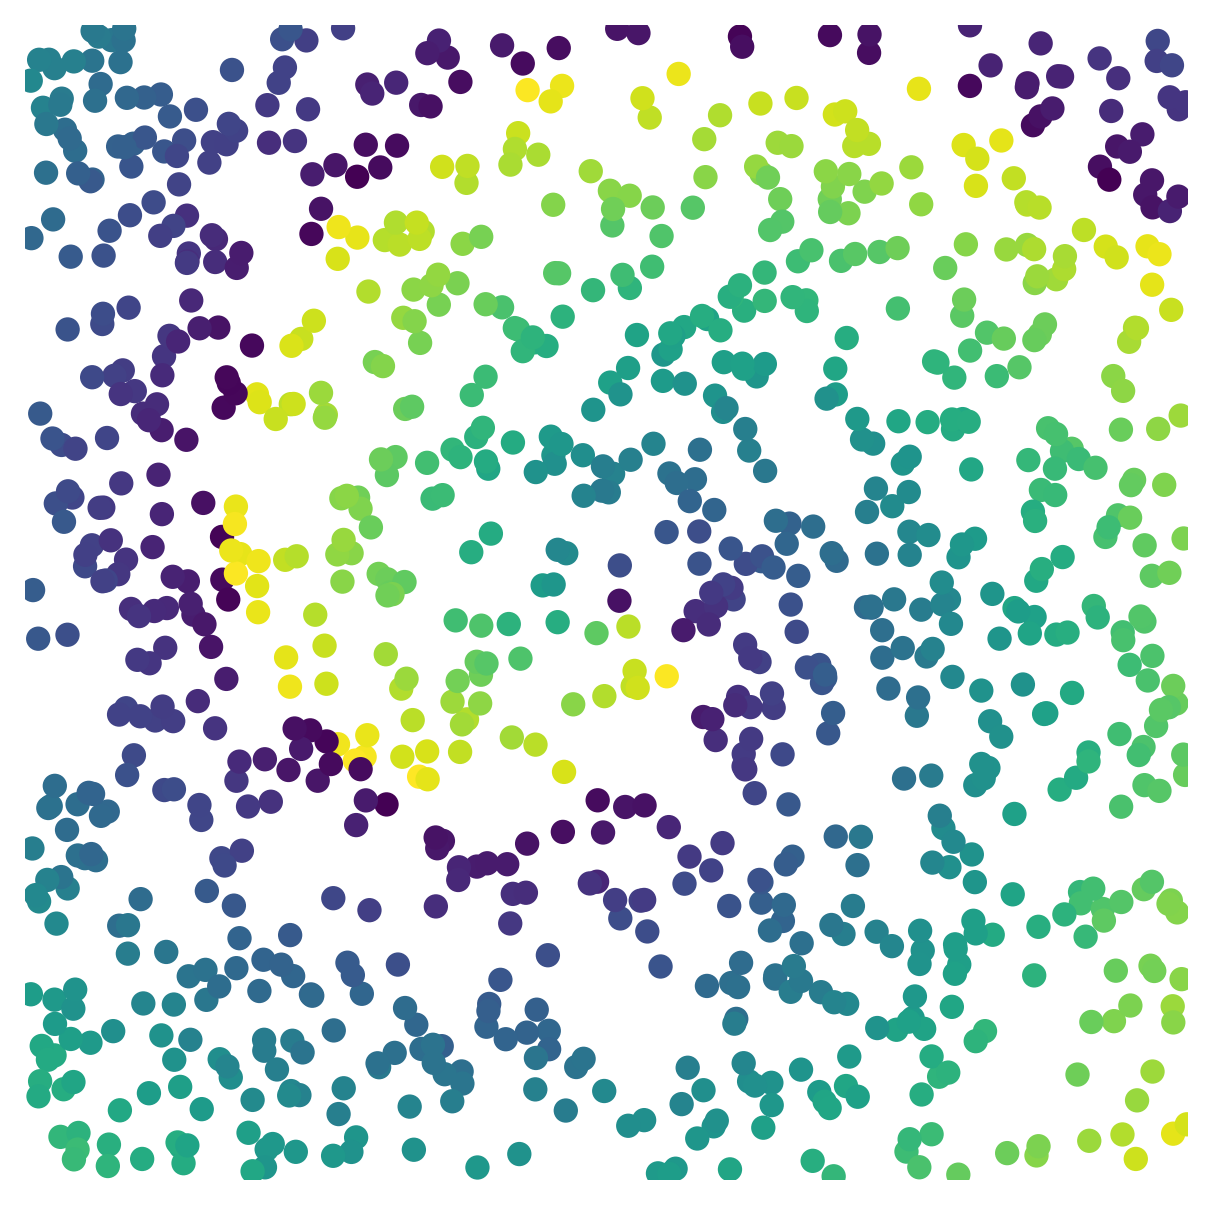

In [38]:
x1, x2 = X[:, 0], X[:, 1]
r = np.sqrt(x1**2 + x2**2)
theta = np.arctan2(x2, x1) 
theta_normalized = (theta + np.pi) / (2 * np.pi)
y = (theta + 5 * r) % (2 * np.pi) + noise
y = y / (2 * np.pi)
y = torch.tensor(y, dtype=torch.float64)

plt.figure(figsize=(6, 6), dpi=250)
plt.scatter(X[:, 0], X[:, 1], c=y)

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axis(False)
plt.show()


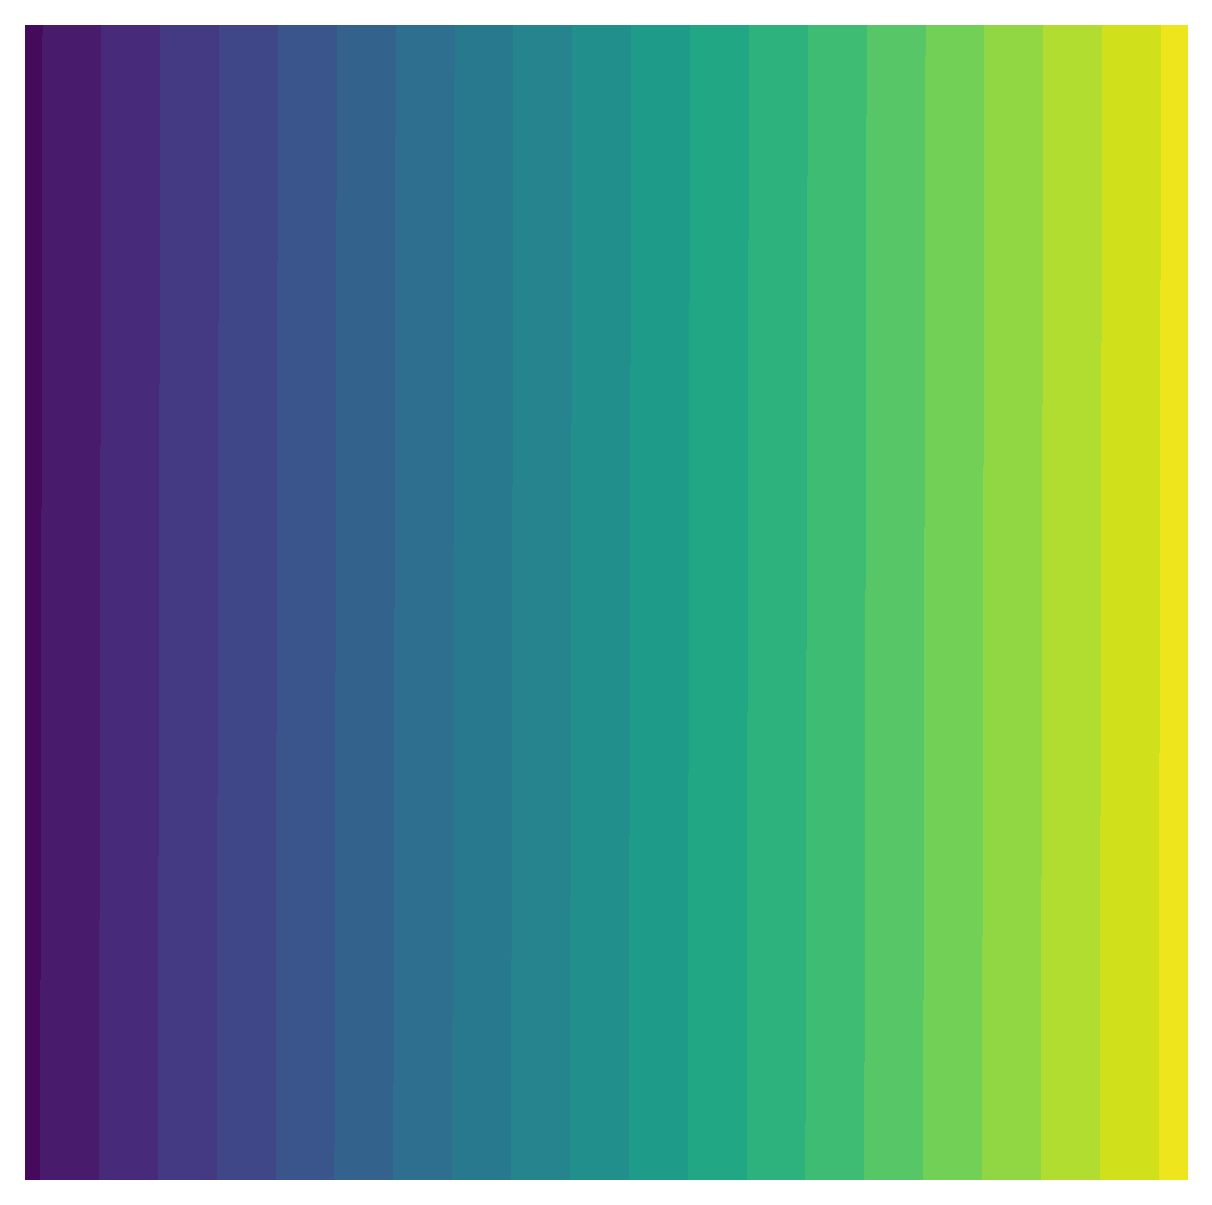

In [39]:
model = LinearRegression()
model.fit(X, y)

preds = model.predict(grid_points).reshape(grid_size, grid_size)

plt.figure(figsize=(6, 6), dpi=250)
plt.contourf(g1, g2, preds, levels=20)

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axis(False)
plt.show()

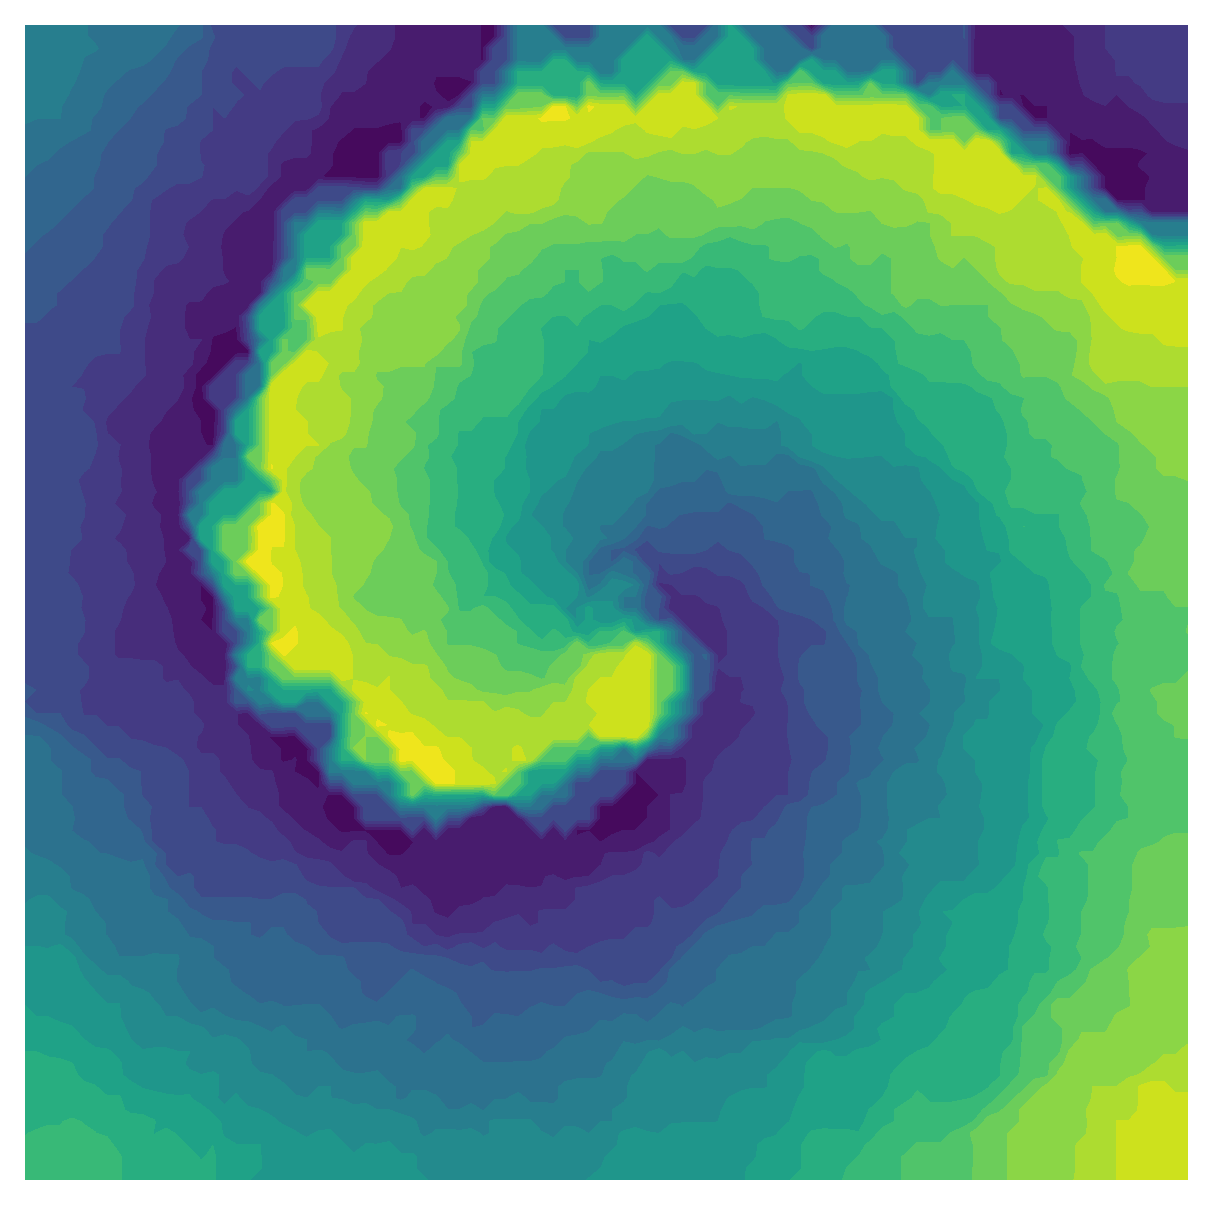

In [40]:
model = KNeighborsRegressor()
model.fit(X, y)

preds = model.predict(grid_points).reshape(grid_size, grid_size)

plt.figure(figsize=(6, 6), dpi=250)
plt.contourf(g1, g2, preds, levels=20)

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axis(False)
plt.show()

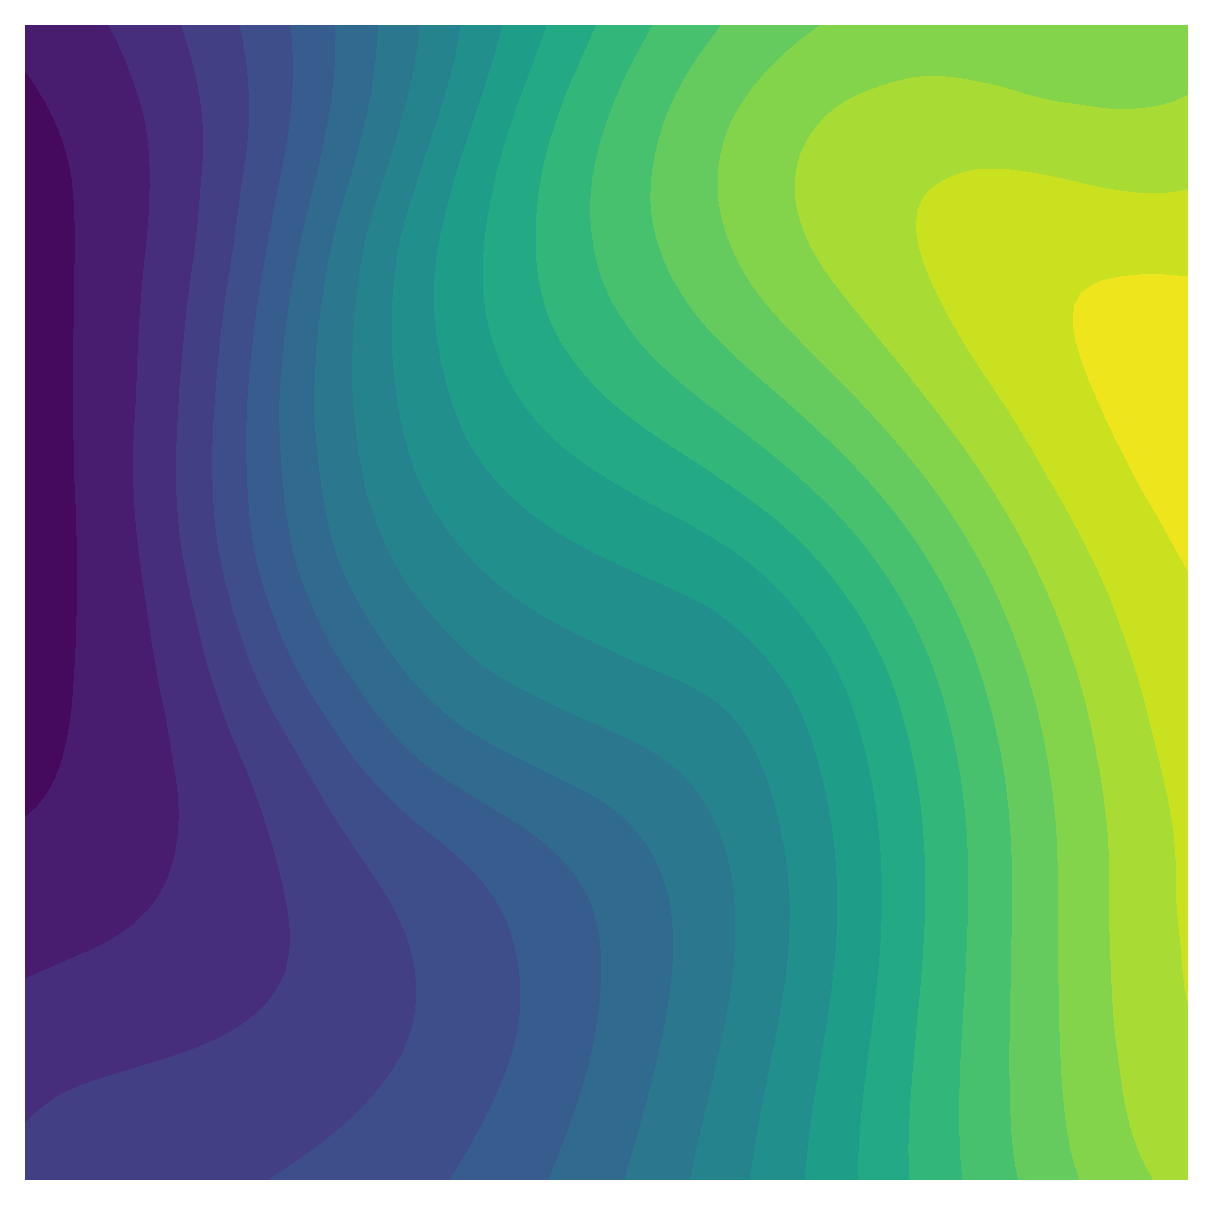

In [41]:
model = models.NONA()
preds = model(grid_points, X, y).reshape(grid_size, grid_size)

# Plot the heatmap using contourf
plt.figure(figsize=(6, 6), dpi=250)
plt.contourf(g1, g2, preds, levels=20)

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axis(False)
plt.show()

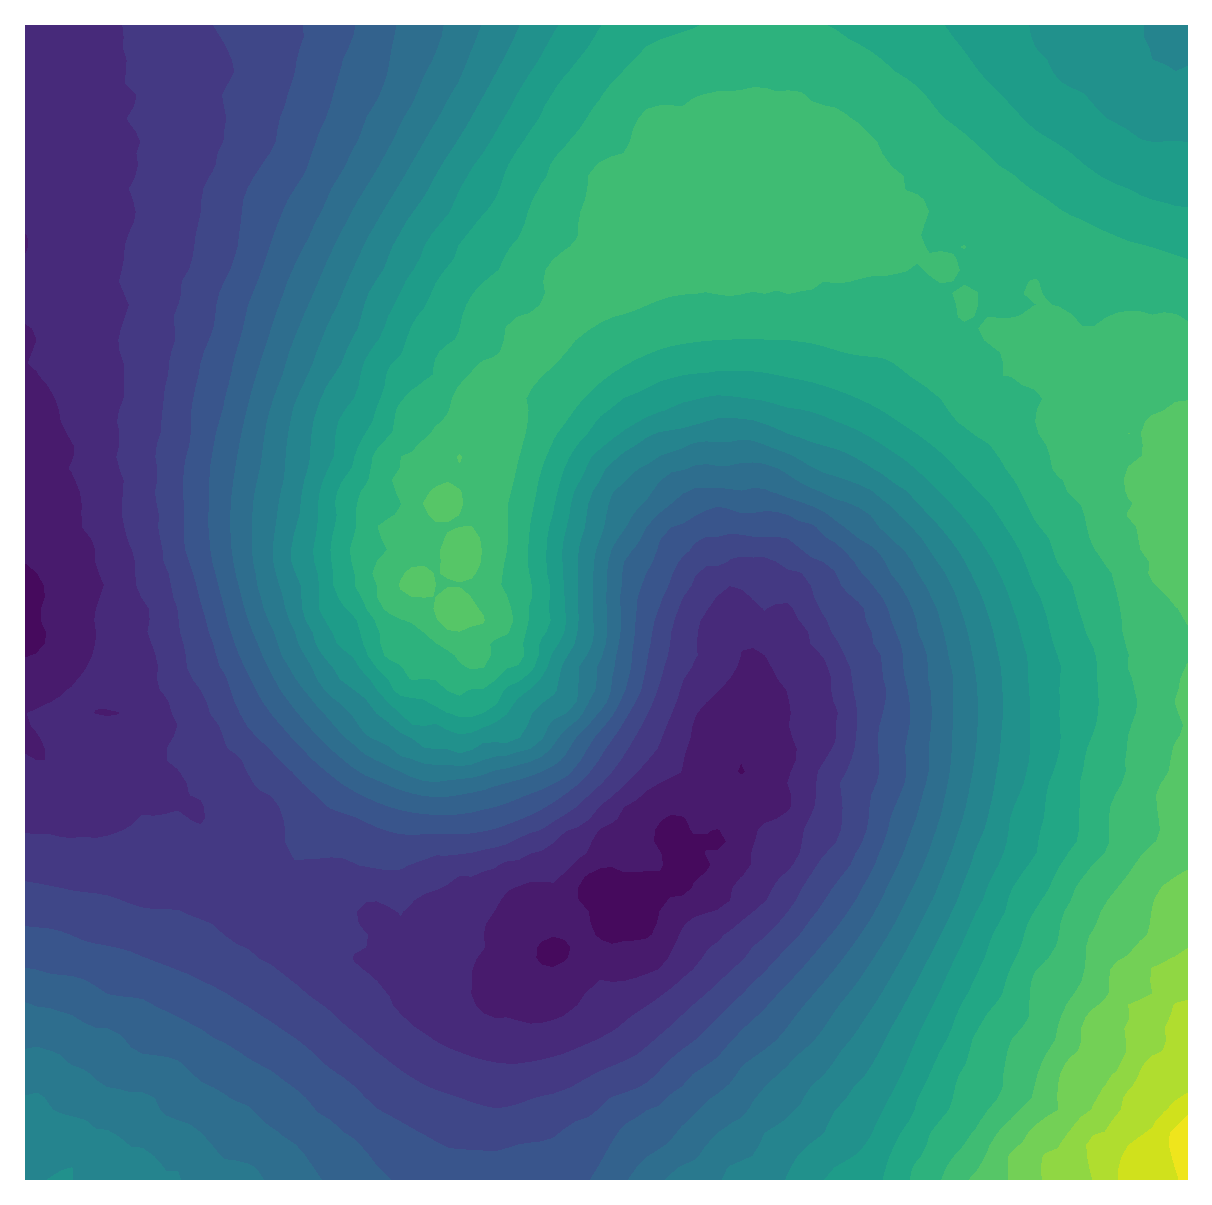

In [42]:
data = TensorDataset(X,y)
loader = DataLoader(data, shuffle=True, batch_size=32)
softstep = s.SoftStep(dims=2, step_fn=2)
model = models.NONA(softstep=softstep)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

for epoch in range(800):
    loss = 0.0
    for x_b,y_b in loader:
        outputs = model(x_b,x_b,y_b)
        l = criterion(outputs, y_b)
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
        loss += l.item()
    loss /= len(loader)

preds = model(grid_points, X, y).reshape(grid_size, grid_size).detach().numpy()

# Plot the heatmap using contourf
plt.figure(figsize=(6, 6), dpi=250)
plt.contourf(g1, g2, preds, levels=20)

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axis(False)
plt.show()

Checkerboard data

/tmp/ipykernel_3888230/395635836.py:2: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  y = np.sin(f * x1) * np.cos(f * x2) + noise
/tmp/ipykernel_3888230/395635836.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.float64)


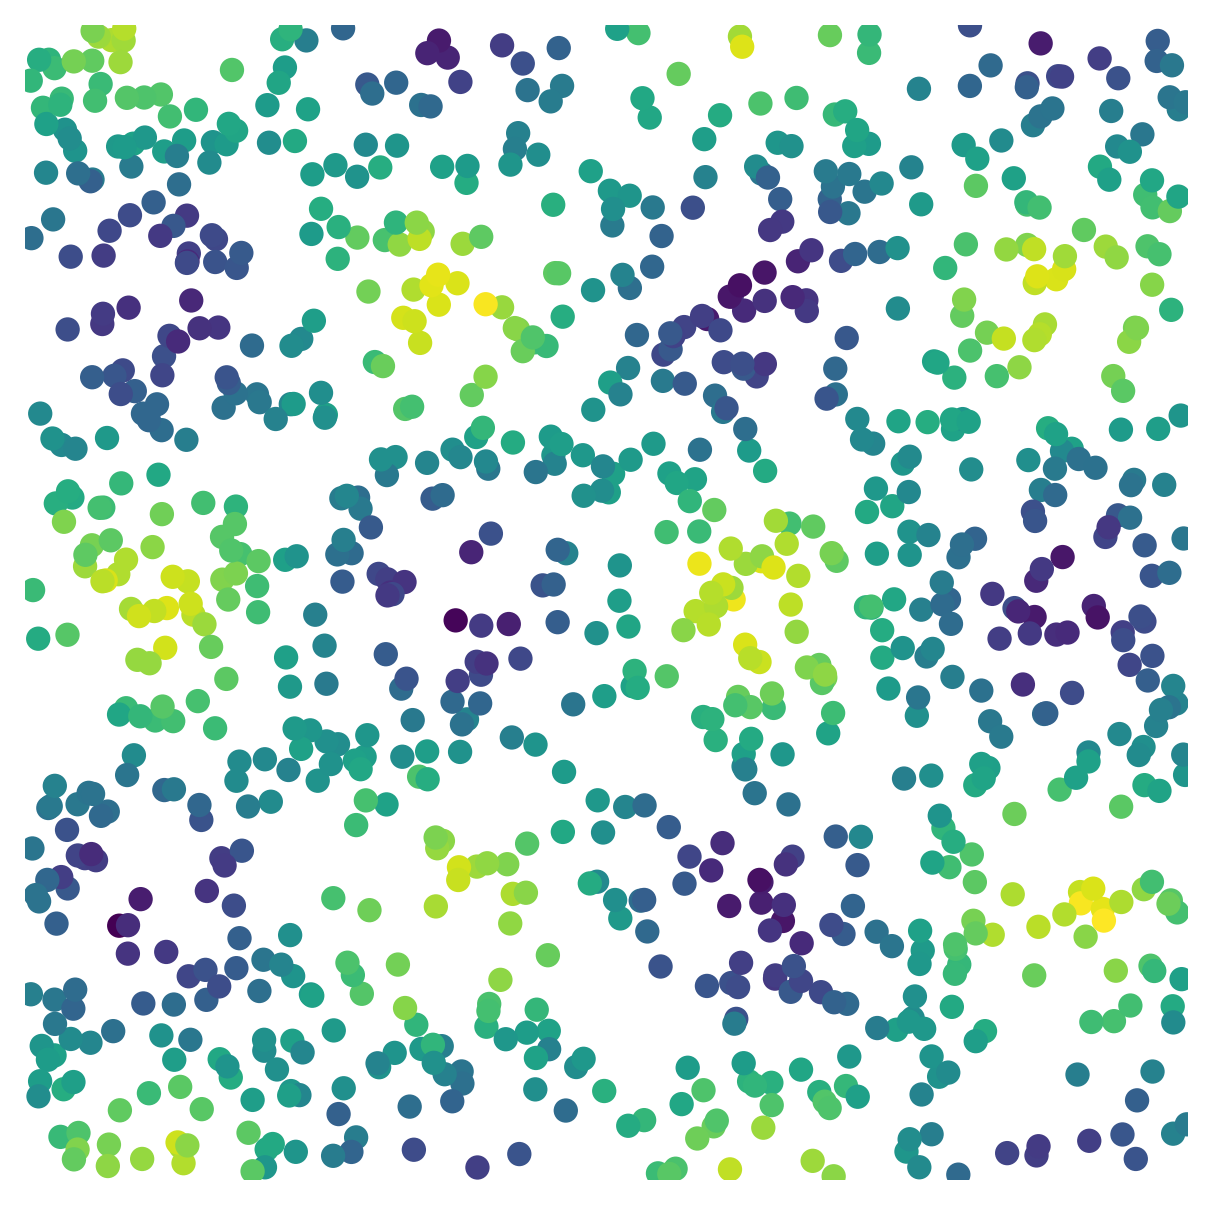

In [43]:
f = 6
y = np.sin(f * x1) * np.cos(f * x2) + noise
y = torch.tensor(y, dtype=torch.float64)

plt.figure(figsize=(6, 6), dpi=250)
plt.scatter(X[:, 0], X[:, 1], c=y)

plt.axis(False)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()

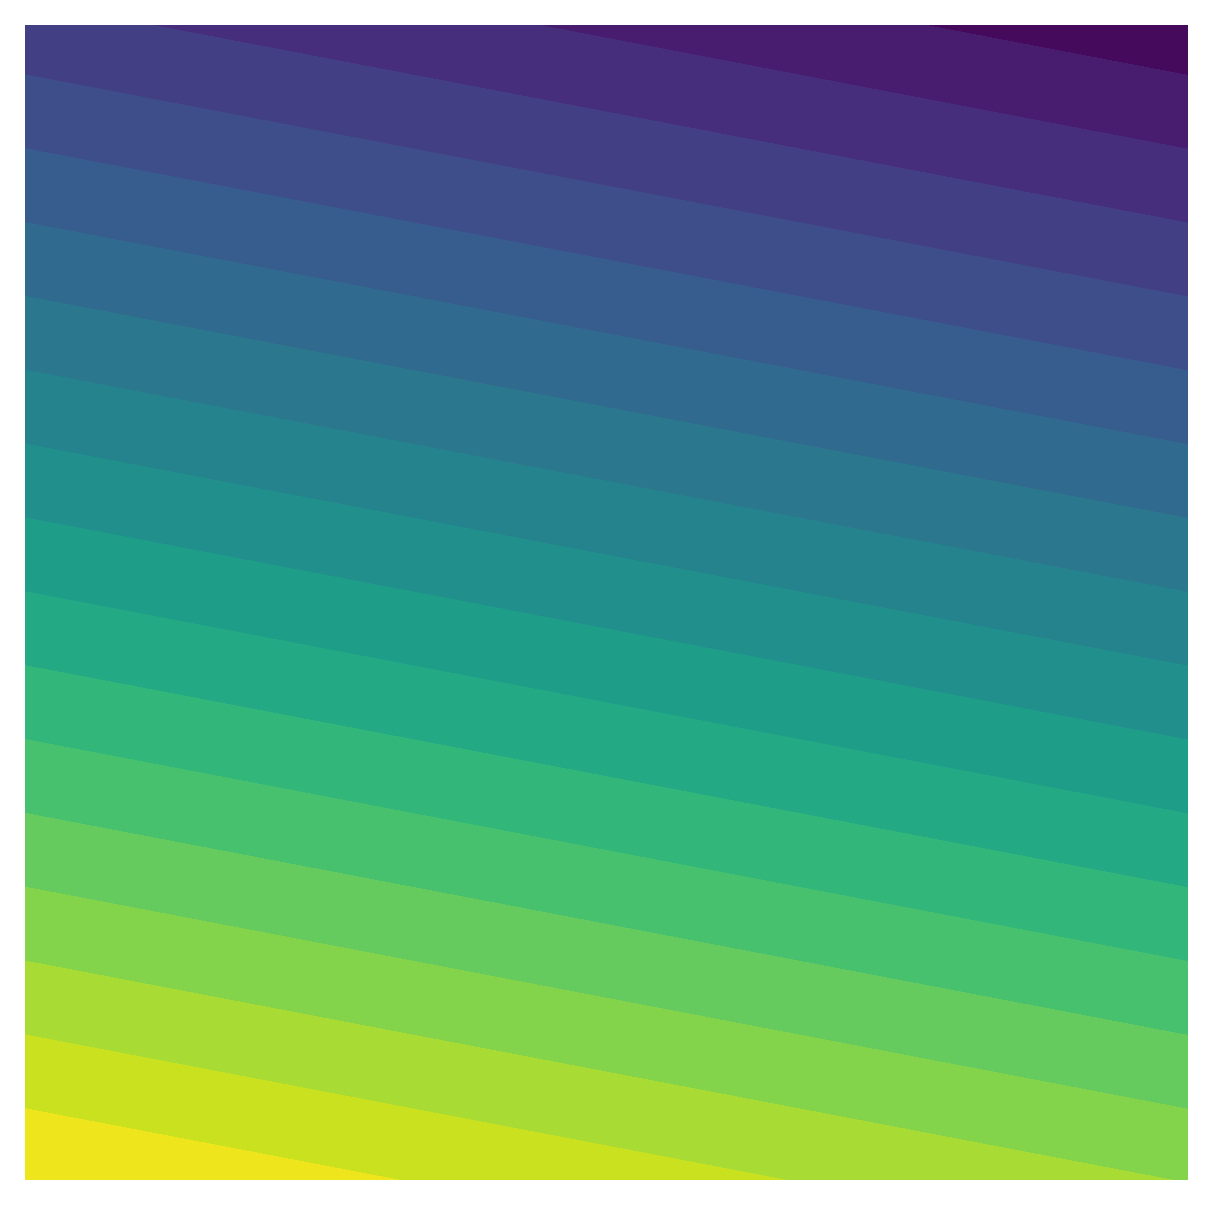

In [44]:
model = LinearRegression()
model.fit(X, y)

preds = model.predict(grid_points).reshape(grid_size, grid_size)

plt.figure(figsize=(6, 6), dpi=250)
plt.contourf(g1, g2, preds, levels=20)

plt.axis(False)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()

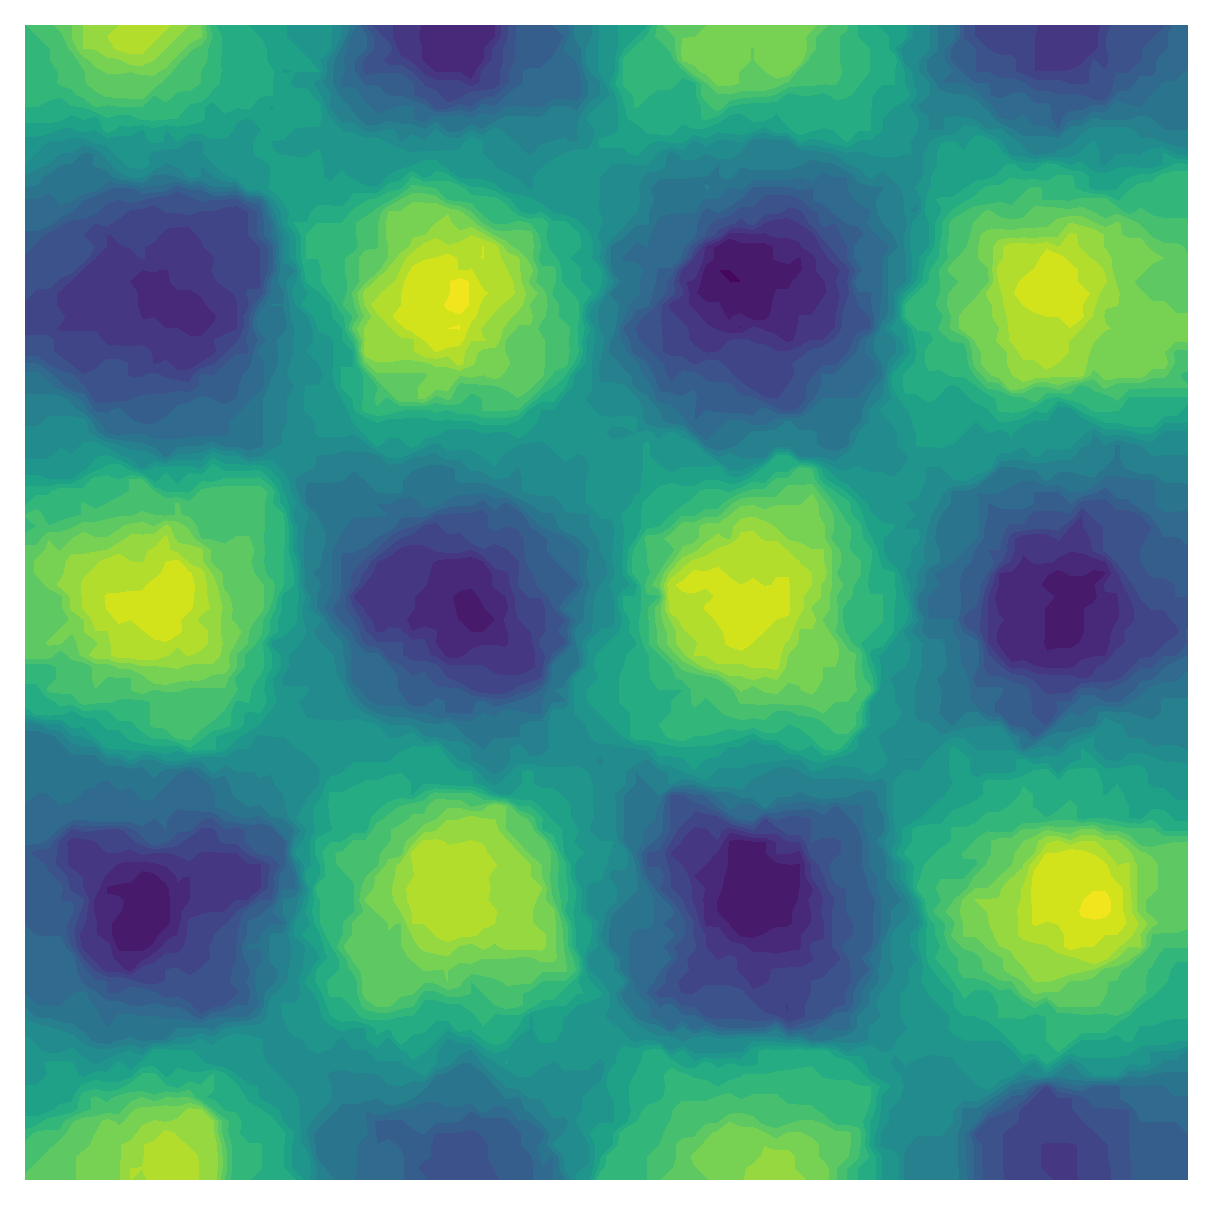

In [45]:
model = KNeighborsRegressor()
model.fit(X, y)

preds = model.predict(grid_points).reshape(grid_size, grid_size)

plt.figure(figsize=(6, 6), dpi=250)
plt.contourf(g1, g2, preds, levels=20)

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axis(False)
plt.show()

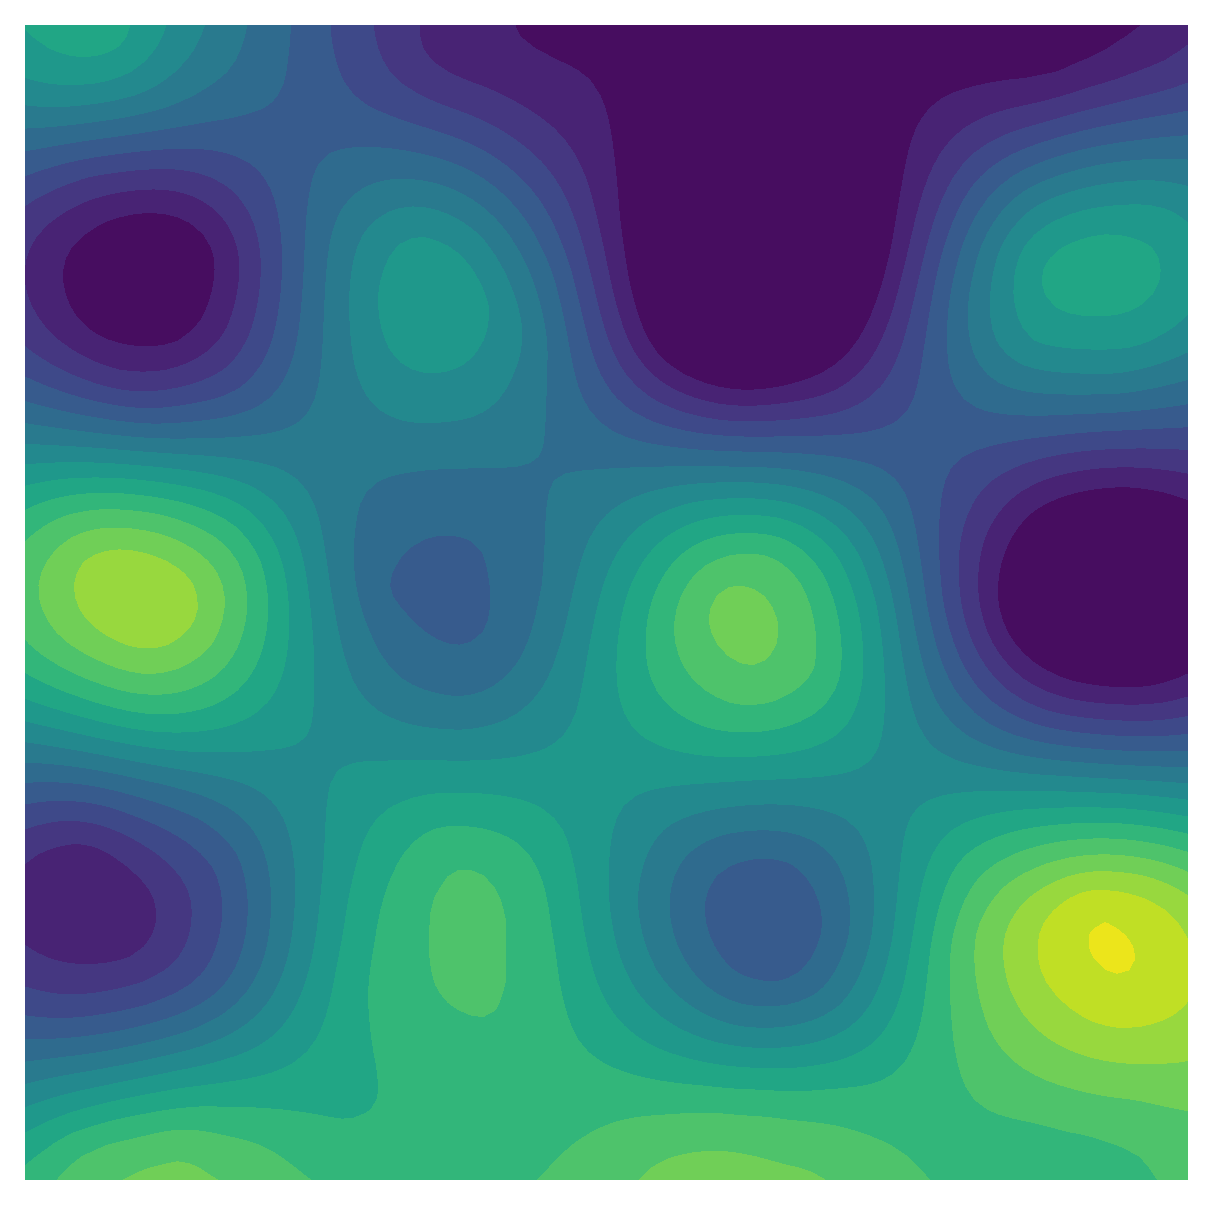

In [46]:
model = models.NONA()
preds = model(grid_points, X, y).reshape(grid_size, grid_size)

# Plot the heatmap using contourf
plt.figure(figsize=(6, 6), dpi=250)
plt.contourf(g1, g2, preds, levels=20)

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axis(False)
plt.show()

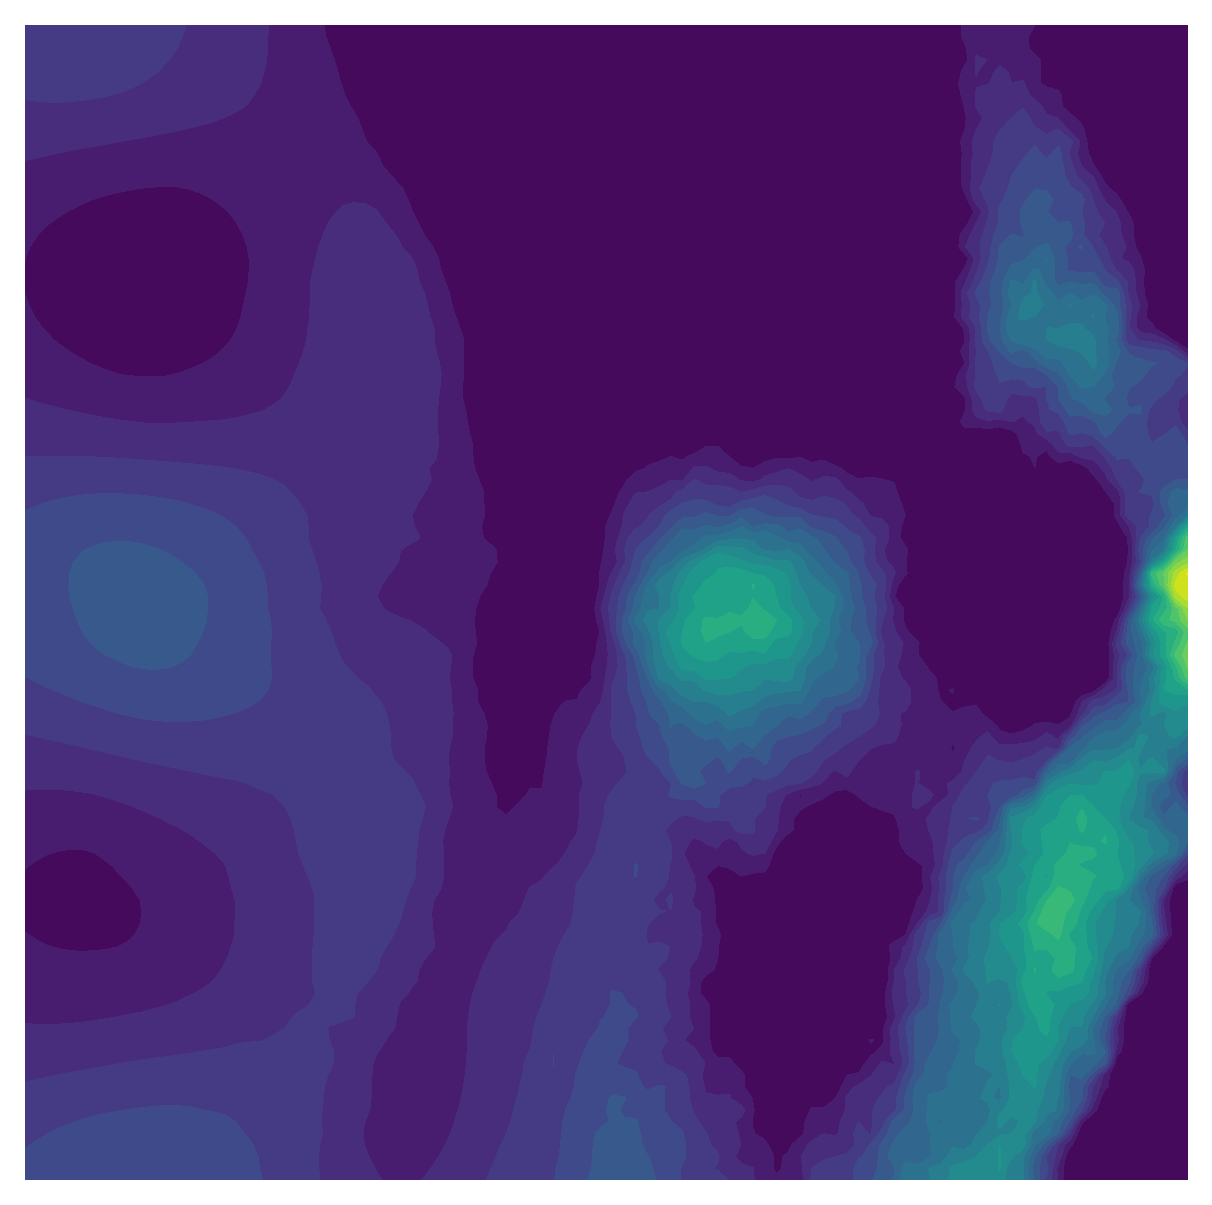

In [47]:
data = TensorDataset(X,y)
loader = DataLoader(data, shuffle=True, batch_size=32)
softstep = s.SoftStep(dims=2, step_fn=2)
model = models.NONA(softstep=softstep)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

for epoch in range(800):
    loss = 0.0
    for x_b,y_b in loader:
        outputs = model(x_b,x_b,y_b)
        l = criterion(outputs, y_b)
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
        loss += l.item()
    loss /= len(loader)

preds = model(grid_points, X, y).reshape(grid_size, grid_size).detach().numpy()

# Plot the heatmap using contourf
plt.figure(figsize=(6, 6), dpi=250)
plt.contourf(g1, g2, preds, levels=20)

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axis(False)
plt.show()